<a href="https://colab.research.google.com/github/amora1es/football-analytics-portfolio/blob/main/01_pandas_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Day 2 notebook ready")

Day 2 notebook ready


In [14]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
)
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
#Analyst checks#
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe())


Shape: (244, 7)

Columns:
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

First 5 rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Missing values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Summary statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [16]:
#How to filter rows
df_high_bill = df[df["total_bill"] > 20]
df_high_bill.head()


,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4


Creating a new column

In [17]:
df["tip_pct"] = df["tip"] / df["total_bill"]
df[["total_bill", "tip", "tip_pct"]].head()


,total_bill,tip,tip_pct
0,16.99,1.01,0.059447
1,10.34,1.66,0.160542
2,21.01,3.50,0.166587
3,23.68,3.31,0.139780
4,24.59,3.61,0.146808


Grouping by summary

In [18]:
df.groupby("day")["tip_pct"].mean().sort_values(ascending=False)


,tip_pct
day,
Fri,0.169913
Sun,0.166897
Thur,0.161276
Sat,0.153152


Simple Visualization

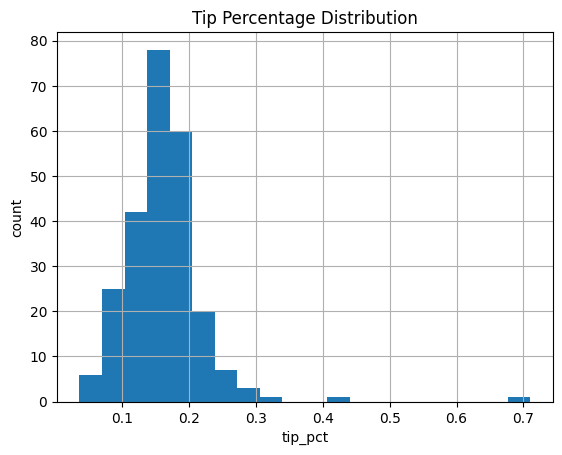

In [19]:
df["tip_pct"].hist(bins=20)
plt.title("Tip Percentage Distribution")
plt.xlabel("tip_pct")
plt.ylabel("count")
plt.show()


# Learning Notes
*   A dataframe can be imported
*   .shape tells us how many rows columns in the dataset (rows, columns)
*   We check missing values to make sure we have accurate data that won't skew the data
*   groupby allows us group by a summary or a specific variable
*   Later we can apply this to soccer datasets to see how to find certain statistics and make a team more efficient








Now practice with a soccer dataset

In [20]:
matches_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/43/3.json"

matches = pd.read_json(matches_url)

matches.head()


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,7585,2018-07-03,20:00:00.000,"{'competition_id': 43, 'country_name': 'Intern...","{'season_id': 3, 'season_name': '2018'}","{'home_team_id': 769, 'home_team_name': 'Colom...","{'away_team_id': 768, 'away_team_name': 'Engla...",1,1,available,scheduled,2023-07-24T13:06:27.791230,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},4,"{'id': 33, 'name': 'Round of 16'}","{'id': 4130, 'name': 'Otkritie Bank Arena', 'c...","{'id': 435, 'name': 'Mark Geiger', 'country': ..."
1,7570,2018-06-28,20:00:00.000,"{'competition_id': 43, 'country_name': 'Intern...","{'season_id': 3, 'season_name': '2018'}","{'home_team_id': 768, 'home_team_name': 'Engla...","{'away_team_id': 782, 'away_team_name': 'Belgi...",0,1,available,scheduled,2023-07-24T13:06:39.637575,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},3,"{'id': 10, 'name': 'Group Stage'}","{'id': 4260, 'name': 'Stadion Kaliningrad', 'c...","{'id': 420, 'name': 'Damir Skomina', 'country'..."
2,7586,2018-07-03,16:00:00.000,"{'competition_id': 43, 'country_name': 'Intern...","{'season_id': 3, 'season_name': '2018'}","{'home_team_id': 790, 'home_team_name': 'Swede...","{'away_team_id': 773, 'away_team_name': 'Switz...",1,0,available,scheduled,2023-07-24T13:05:18.578795,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},4,"{'id': 33, 'name': 'Round of 16'}","{'id': 4726, 'name': 'Saint-Petersburg Stadium...","{'id': 420, 'name': 'Damir Skomina', 'country'..."
3,7557,2018-06-25,20:00:00.000,"{'competition_id': 43, 'country_name': 'Intern...","{'season_id': 3, 'season_name': '2018'}","{'home_team_id': 797, 'home_team_name': 'Iran'...","{'away_team_id': 780, 'away_team_name': 'Portu...",1,1,available,scheduled,2023-07-24T13:03:08.956903,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},3,"{'id': 10, 'name': 'Group Stage'}","{'id': 4259, 'name': 'Mordovia Arena', 'countr...","{'id': 731, 'name': 'Enrique Cáceres', 'countr..."
4,7542,2018-06-20,14:00:00.000,"{'competition_id': 43, 'country_name': 'Intern...","{'season_id': 3, 'season_name': '2018'}","{'home_team_id': 780, 'home_team_name': 'Portu...","{'away_team_id': 788, 'away_team_name': 'Moroc...",1,0,available,scheduled,2023-07-24T13:02:10.657273,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},2,"{'id': 10, 'name': 'Group Stage'}","{'id': 255, 'name': 'Stadion Luzhniki', 'count...","{'id': 435, 'name': 'Mark Geiger', 'country': ..."


In [21]:
print("Shape:", matches.shape)

print("\nColumns:")
print(matches.columns)

print("\nFirst 5 rows:")
print(matches.head())

print("\nMissing values:")
print(matches.isna().sum())


Shape: (64, 18)

Columns:
Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'metadata',
       'match_week', 'competition_stage', 'stadium', 'referee'],
      dtype='object')

First 5 rows:
   match_id  match_date      kick_off  \
0      7585  2018-07-03  20:00:00.000   
1      7570  2018-06-28  20:00:00.000   
2      7586  2018-07-03  16:00:00.000   
3      7557  2018-06-25  20:00:00.000   
4      7542  2018-06-20  14:00:00.000   

                                         competition  \
0  {'competition_id': 43, 'country_name': 'Intern...   
1  {'competition_id': 43, 'country_name': 'Intern...   
2  {'competition_id': 43, 'country_name': 'Intern...   
3  {'competition_id': 43, 'country_name': 'Intern...   
4  {'competition_id': 43, 'country_name': 'Intern...   

                                    season  \
0  {'season_id': 3, 

In [23]:
matches["home_team_name"] = matches["home_team"].apply(lambda x: x["home_team_name"])
matches["away_team_name"] = matches["away_team"].apply(lambda x: x["away_team_name"])


In [24]:
matches[["home_team_name", "away_team_name"]].head()


,home_team_name,away_team_name
0,Colombia,England
1,England,Belgium
2,Sweden,Switzerland
3,Iran,Portugal
4,Portugal,Morocco


In [27]:
#Goals per match
matches["total_goals"] = matches["home_score"] + matches["away_score"]
matches["total_goals"].describe() #the describe gives us all the math values analyzers usually want


,total_goals
count,64.000000
mean,2.640625
std,1.577291
min,0.000000
25%,1.750000
50%,2.000000
75%,3.000000
max,7.000000


In [30]:
#highest scoring matches
matches.sort_values("total_goals", ascending=False)[
    ["home_team_name", "away_team_name", "home_score", "away_score", "total_goals"]
].head(10)


,home_team_name,away_team_name,home_score,away_score,total_goals
6,England,Panama,6,1,7
21,France,Argentina,4,3,7
43,Belgium,Tunisia,5,2,7
17,Portugal,Spain,3,3,6
39,France,Croatia,4,2,6
36,Belgium,Japan,3,2,5
52,Russia,Saudi Arabia,5,0,5
30,Switzerland,Costa Rica,2,2,4
45,Spain,Morocco,2,2,4
62,Japan,Senegal,2,2,4


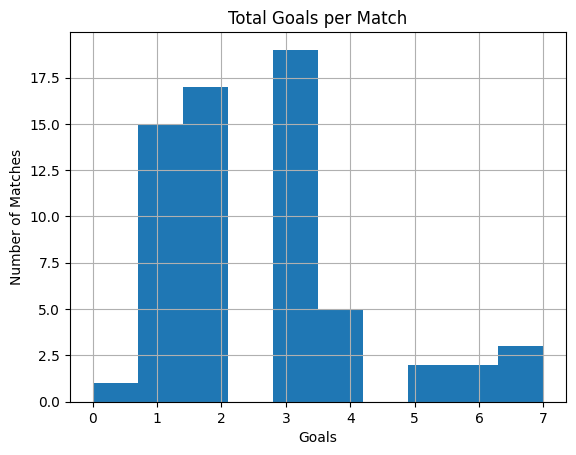

In [35]:
matches["total_goals"].hist(bins=10)
plt.title("Total Goals per Match")
plt.xlabel("Goals")
plt.ylabel("Number of Matches")
plt.show()
